### Ensemble Methods
<i>Averaging Methods, Boosting Methods</i>

> Index: 
1. Bagging Meta Estimator
2. Random Forest
3. Extremely Randomized Trees 
4. AdaBoost
5. Gradient Boosting 
6. Histogram based Gradient Boosting
7. Voting
8. Stacking

In [45]:
import warnings
warnings.filterwarnings("ignore")

<b>Bagging Meta-Estimator</b>

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                                    max_samples=0.5, max_features=0.5)

<b>Forests of Randomized Trees</b>

In [3]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit(X, Y)

<b>Extremely Randomized Trees </b>

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples = 10000, n_features = 10, centers = 100, random_state = 0)
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y, cv = 5)
scores.mean()

0.9823000000000001

In [5]:
clf = RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y, cv = 5)
scores.mean()

0.9997

In [6]:
clf = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y, cv = 5)
scores.mean()

1.0

<b>AdaBoost</b>

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y = True)
clf = AdaBoostClassifier(n_estimators = 100)
scores = cross_val_score(clf, X, y, cv = 5)
scores.mean()

0.9466666666666665

<b>Gradient Tree Boosting</b>
1. Classification

In [16]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state = 0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.1, 
                                 max_depth = 1, random_state = 0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9158

2.1 Regression

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples = 1200, random_state = 0, noise = 1)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 1, 
                                random_state = 0, loss = "squared_error").fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

5.009154859960319

2.2 Fitting additional weak learners

In [27]:
_ = est.set_params(n_estimators=200, warm_start=True)  # set warm_start and new nr of trees
_ = est.fit(X_train, y_train) # fit additional 100 trees to est
mean_squared_error(y_test, est.predict(X_test))

3.840234741105356

2.3 Interpretation with Feature Importance

In [28]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state = 0)
clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, 
                                 max_depth = 1, random_state = 0).fit(X, y)
clf.feature_importances_

array([0.10684213, 0.10461707, 0.11265447, 0.09863589, 0.09469133,
       0.10729306, 0.09163753, 0.09718194, 0.09581415, 0.09063242])

Note that this computation of feature importance is based on entropy, and it is distinct from sklearn.inspection.permutation_importance which is based on permutation of the features.

<b>Histogram based Gradient Boosting</b>

In [32]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

X, y = make_hastie_10_2(random_state = 0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = HistGradientBoostingClassifier(max_iter = 100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8965

1. Missing Values Support

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

X = np.array([0, 1, 2, np.nan]).reshape(-1, 1)
y = [0, 0, 1, 1]

gbdt = HistGradientBoostingClassifier(min_samples_leaf=1).fit(X, y)
gbdt.predict(X)

array([0, 0, 1, 1])

In [34]:
X = np.array([0, np.nan, 1, 2, np.nan]).reshape(-1, 1)
y = [0, 1, 0, 0, 1]
gbdt = HistGradientBoostingClassifier(min_samples_leaf=1,
                                       max_depth=2,
                                       learning_rate=1,
                                       max_iter=1).fit(X, y)
gbdt.predict(X)

array([0, 1, 0, 0, 1])

2. Sample Weight Support 

In [35]:
X = [[1, 0],
     [1, 0],
     [1, 0],
     [0, 1]]

y = [0, 0, 1, 0]

# ignore the first 2 training samples by setting their weight to 0

sample_weight = [0, 0, 1, 1]
gb = HistGradientBoostingClassifier(min_samples_leaf=1)
gb.fit(X, y, sample_weight=sample_weight)

HistGradientBoostingClassifier(min_samples_leaf=1)

In [37]:
gb.predict([[1, 0]])

array([1])

In [38]:
gb.predict_proba([[1, 0]])[0, 1]

0.9990209190235209

3. Monotonic Constraints

In [39]:
from sklearn.ensemble import HistGradientBoostingRegressor

# monotonic increase, monotonic decrease, and no constraint on the 3 features
gbdt = HistGradientBoostingRegressor(monotonic_cst=[1, -1, 0])


<b>Voting Classifier</b>

In [41]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state = 1)
clf2 = RandomForestClassifier(n_estimators = 50, random_state = 1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators = [('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
                       voting = "hard")

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


<b>Weighted Average Voting - Soft Probabilities</b> 

In [43]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.93 (+/- 0.07) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.95 (+/- 0.03) [naive Bayes]
Accuracy: 0.93 (+/- 0.07) [Ensemble]


<b>Using the VotingClassifier with GridSearchCV</b>

In [46]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft'
)

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

In [47]:
grid

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(random_state=1)),
                                                    ('rf',
                                                     RandomForestClassifier(random_state=1)),
                                                    ('gnb', GaussianNB())],
                                        voting='soft'),
             param_grid={'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]})

In [51]:
grid.best_params_

{'lr__C': 1.0, 'rf__n_estimators': 200}

In [53]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

In [54]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft', weights=[2,5,1])

<b>Voting Regressors</b> 

In [58]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
X, y = load_diabetes(return_X_y=True)

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

reg1 = reg1.fit(X, y)
reg2 = reg2.fit(X, y)
reg3 = reg3.fit(X, y)
ereg = ereg.fit(X, y)

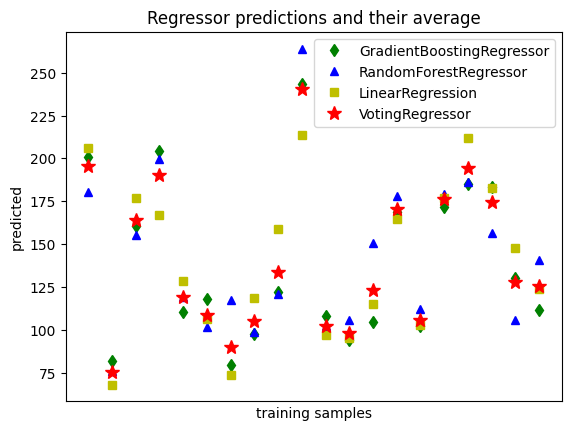

In [59]:
import matplotlib.pyplot as plt

xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

<b>Stacked Generalization</b>

Stacked generalization is a method for combining estimators to reduce their biases.More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

In [60]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
final_estimator = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

In [62]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge', RidgeCV()),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=42,
                                                            subsample=0.5))

In [63]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.53


In [64]:
reg.transform(X_test[:5])

array([[142.36209608, 138.30724927, 146.1       ],
       [179.700576  , 182.89812552, 151.75      ],
       [139.89817956, 132.46803343, 158.25      ],
       [286.95180286, 292.65695767, 225.4       ],
       [126.88317154, 124.1215975 , 164.65      ]])

<b>The End.</b>